# Outlines

- [1 - Import Libraries](#1)
- [2 - Load & Explore Data](#2)
- [3- Data Cleaning](#3)
    - [3.1- Irrelevant Data](#3.1)
    - [3.2- Missing Data](#3.2)
    - [3.3- Duplicated Data](#3.3)
    - [3.4- Outliers](#3.4)
- [4- Data Visualization & EDA](#4)

# 1. Import Libraries

In [194]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for data exploration
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats to 2 decimals

# 2. Loading & Exploring Data

In [195]:
# Load the dataset

credit_data = pd.read_csv("credit_train.csv")
credit_data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# General information about the dataset

print("\nDataset Information:")
credit_data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last deli

There are generally 100,000 non-null values, and rows with null values may be at the bottom of table. Extract all rows from index 100,000 onward and calculate the total number of missing values in each column to identify and analyze potential data quality issues in the later part of the dataset.


In [197]:
# Checking for missing/null values 

last_nan = credit_data.iloc[100000:]
last_nan.isna().sum()

Loan ID                         514
Customer ID                     514
Loan Status                     514
Current Loan Amount             514
Term                            514
Credit Score                    514
Annual Income                   514
Years in current job            514
Home Ownership                  514
Purpose                         514
Monthly Debt                    514
Years of Credit History         514
Months since last delinquent    514
Number of Open Accounts         514
Number of Credit Problems       514
Current Credit Balance          514
Maximum Open Credit             514
Bankruptcies                    514
Tax Liens                       514
dtype: int64

Observation: The Last 514 rows are Missing Values, so we can drop them

In [198]:
# Selects the first 10,000 rows of the dataset and assigns them back to the credit_data variable

credit_data = credit_data.iloc[:10000]
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Loan Status                   10000 non-null  object 
 3   Current Loan Amount           10000 non-null  float64
 4   Term                          10000 non-null  object 
 5   Credit Score                  8063 non-null   float64
 6   Annual Income                 8063 non-null   float64
 7   Years in current job          9570 non-null   object 
 8   Home Ownership                10000 non-null  object 
 9   Purpose                       10000 non-null  object 
 10  Monthly Debt                  10000 non-null  float64
 11  Years of Credit History       10000 non-null  float64
 12  Months since last delinquent  4702 non-null   float64
 13  Nu

In [199]:
# Summary statistics (numerical columns)

print("\nSummary Statistics:")
print(credit_data.describe())


Summary Statistics:
       Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
count             10000.00       8063.00        8063.00      10000.00   
mean           11637235.95       1105.57     1373190.22      18437.49   
std            31635304.47       1527.66      858761.54      12075.21   
min               21472.00        589.00      111245.00          0.00   
25%              178739.00        705.00      845386.00      10064.40   
50%              311762.00        724.00     1167683.00      16186.01   
75%              524689.00        741.00     1640792.50      24066.87   
max            99999999.00       7510.00     9458200.00     120559.56   

       Years of Credit History  Months since last delinquent  \
count                 10000.00                       4702.00   
mean                     18.24                         35.44   
std                       6.95                         22.13   
min                       3.60                          0.00   
2

In [200]:
# Check for categorical and numerical columns

categorical_columns = credit_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = credit_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\nCategorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']
Numerical Columns: ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


In [201]:
# Calculate the number of unique values in each column of the dataset

print(f"Number of unique values:")
credit_data.nunique()

Number of unique values:


Loan ID                         9828
Customer ID                     9828
Loan Status                        2
Current Loan Amount             6763
Term                               2
Credit Score                     281
Annual Income                   7130
Years in current job              11
Home Ownership                     4
Purpose                           15
Monthly Debt                    9579
Years of Credit History          423
Months since last delinquent      91
Number of Open Accounts           44
Number of Credit Problems          8
Current Credit Balance          8347
Maximum Open Credit             8905
Bankruptcies                       6
Tax Liens                          7
dtype: int64

In [202]:
# Iterate through all columns starting from the 3rd column (index 2) in the dataset
for col in credit_data.columns[2:]:
    # Check if the column has fewer than 16 unique values (categorical or low-cardinality data)
    if credit_data[col].nunique() < 16:
        # Print the column name and its unique values for inspection
        print(col + ": " + str(credit_data[col].unique()))
        print("-------------------------------------------------------------")

Loan Status: ['Fully Paid' 'Charged Off']
-------------------------------------------------------------
Term: ['Short Term' 'Long Term']
-------------------------------------------------------------
Years in current job: ['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' nan '6 years']
-------------------------------------------------------------
Home Ownership: ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
-------------------------------------------------------------
Purpose: ['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving']
-------------------------------------------------------------
Number of Credit Problems: [1. 0. 2. 5. 4. 3. 7. 6.]
-------------------------------------------------------------
Bankruptcies: [ 1.  0.  2.  3. nan  5.  4.]
--------------------

In [203]:
# Iterate through all columns in the dataset starting from the 3rd column (index 2)
for col in credit_data.columns[2:]:
    # Print the value counts for the current column
    print(str(credit_data[col].value_counts()))
    print("-------------------------------------------------------------")

Loan Status
Fully Paid     7693
Charged Off    2307
Name: count, dtype: int64
-------------------------------------------------------------
Current Loan Amount
99999999.00    1136
134288.00         8
215358.00         6
112706.00         6
225126.00         6
               ... 
474540.00         1
199518.00         1
280302.00         1
782782.00         1
161304.00         1
Name: count, Length: 6763, dtype: int64
-------------------------------------------------------------
Term
Short Term    7181
Long Term     2819
Name: count, dtype: int64
-------------------------------------------------------------
Credit Score
747.00     192
745.00     182
740.00     178
741.00     170
739.00     169
          ... 
6080.00      1
6200.00      1
6570.00      1
6110.00      1
6250.00      1
Name: count, Length: 281, dtype: int64
-------------------------------------------------------------
Annual Income
1130196.00    5
1243284.00    5
1138518.00    5
940120.00     5
1791529.00    4
             .

In [204]:
# Count the number of duplicate rows in the dataset
print("Number of duplicate rows in the dataset:")
credit_data.duplicated().sum()

Number of duplicate rows in the dataset:


np.int64(99)

In [205]:
# Calculate the total number of missing values (NaN) in each column of the dataset
print("Number of missing values (NaN) for each:")
credit_data.isna().sum()

Number of missing values (NaN) for each:


Loan ID                            0
Customer ID                        0
Loan Status                        0
Current Loan Amount                0
Term                               0
Credit Score                    1937
Annual Income                   1937
Years in current job             430
Home Ownership                     0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent    5298
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                      17
Tax Liens                          1
dtype: int64

### Observations
1. **Dataset Overview**:
   - The dataset contains **19 columns** and **10,000 rows**.
   - Out of these, there are **7 categorical columns** and **12 numerical columns**.

2. **Duplicated Values**:
   - The dataset has **99 duplicated rows**, which can be dropped to clean the data.

3. **Irrelevant Columns**:
   - Columns like `Loan ID` and `Customer ID` are identifiers and don't contribute to analysis. These can be dropped.

4. **Missing Values**:
   - The column `Months since last delinquent` has **5,298 missing values**, which is more than 50% of the dataset, thus we will drop this column.
   - The columns `Credit Score` and `Annual Income` both have **1,937 missing values**, and their null patterns appear similar, indicating they may need to be handled together.
   - The column `Years in current job` has **430 missing values** and requires imputation.

### Next Steps:
   - **Purpose** column:
     - Replace `other` with `Other` for consistency in formatting.
     - Combine categories into fewer groups for better analysis (e.g., consolidate purposes into major categories like `Debt Consolidation`, `Home Improvement`, etc.).
   - **Home Ownership** column:
     - Replace `HaveMortgage` with `Home Mortgage` to standardize the naming.
   - **Years in Current Job** column:
     - Consolidate categories like `1 year`, `2 years`, ..., `10+ years` into fewer bins (e.g., `0-2 years`, `3-5 years`, `6-10+ years`).

#### Data Transformation

#### Outliers:
   - Analyze numerical columns like `Credit Score`, `Annual Income`, and `Current Loan Amount` for outliers using boxplots.
   - Handle outliers using capping or transformations as necessary.

# 3. Data Cleaning

## 3.1 Irrelevant Data

In [206]:
# Drop irrelevant columns like `Loan ID`, `Customer ID`, and the column `Months since last delinquent`
credit_data = credit_data.drop(columns=["Loan ID", "Customer ID"])

In [207]:
# Standardising the Purpose column 
purpose_mapping = {  
    'Home Improvements': 'Big Purchase',
    'Buy House': 'Big Purchase',
    'moving': 'Big Purchase',
    'Buy a Car': 'Big Purchase',
    'major_purchase': 'Big Purchase',
    'wedding': 'Big Purchase',

    'Debt Consolidation': 'Debt Consolidation',

    'Business Loan': 'Business Loan',
    'small_business': 'Business Loan',

    'Buy a Car': 'Essential Needs',
    'Medical Bills': 'Essential Needs',
    'Educational Expenses': 'Essential Needs',

    'vacation': 'Leisure',
    'Take a Trip': 'Leisure',

    'other': 'Other',
    'Other': 'Other'
}

credit_data['Purpose'] = credit_data['Purpose'].replace(purpose_mapping)

In [208]:
# Standardizing Home Ownership column
credit_data["Home Ownership"] = credit_data["Home Ownership"].replace({"HaveMortgage":"Home Mortgage"})

In [209]:
# Standardise years in current job column
credit_data["Years in current job"] = credit_data["Years in current job"].replace({"7 years":"7-9 years",
                                                                                 "8 years":"7-9 years",
                                                                                 "9 years":"7-9 years",
                                                                                 "4 years":"4-6 years",
                                                                                 "5 years":"4-6 years",
                                                                                 "6 years":"4-6 years",
                                                                                 "< 1 year":"0-1 year",
                                                                                 "1 year":"0-1 year",
                                                                                 "2 years":"2-3 years",
                                                                                 "3 years":"2-3 years"})

### Identifying Unique Values in Categorical Columns for Data Cleaning and Standardization

#### Description:
This step is part of the exploratory data analysis (EDA) process to inspect and understand the unique values in categorical columns. By identifying these values, we can detect inconsistencies, redundant categories, or formatting issues. This is crucial for cleaning, standardizing, and encoding the categorical data to prepare it for analysis or machine learning.

In [210]:
print('Purpose: ')
print(credit_data["Purpose"].unique())
print('Home Ownership: ')
print(credit_data["Home Ownership"].unique())
print('Years in current job: ')
print(credit_data["Years in current job"].unique())

Purpose: 
['Big Purchase' 'Debt Consolidation' 'Other' 'Business Loan'
 'Essential Needs' 'Leisure']
Home Ownership: 
['Home Mortgage' 'Own Home' 'Rent']
Years in current job: 
['7-9 years' '10+ years' '2-3 years' '4-6 years' '0-1 year' nan]


## 3.2 Missing Data

-  visualizes how the presence or absence of missing values correlates with another feature.

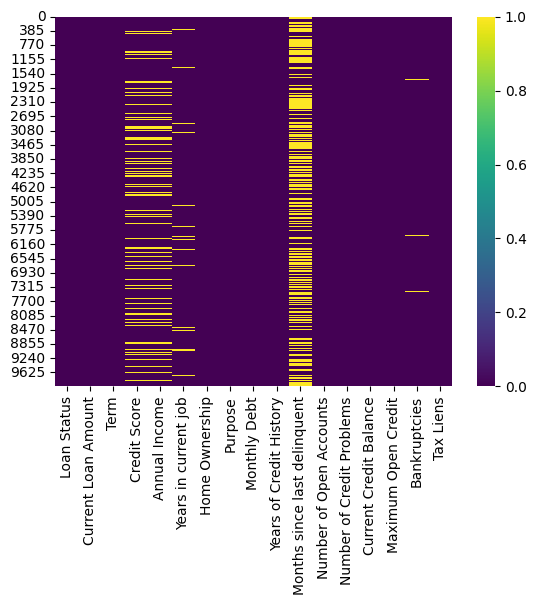

In [211]:
sns.heatmap(credit_data.isnull(), cmap='viridis')
plt.show()

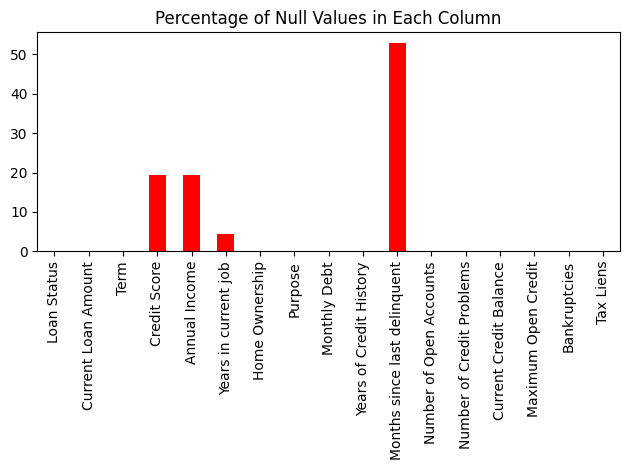

In [212]:
# Calculate the percentage of missing (null) values in each column
# `mean(axis=0)` calculates the column-wise mean, giving the proportion of missing values
null_percentages = credit_data.isnull().mean(axis=0) * 100

# Plot a bar chart to visualize the percentage of missing values in each column
null_percentages.plot(kind='bar', color='red')
plt.title('Percentage of Null Values in Each Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Observations and Comments:
  1. Based on bar chart and heatmap:
     - The column `Months since last delinquent` contains the highest proportion of missing values, approximately 53%. Given the substantial percentage, it is reasonable to drop this column entirely.
     - The `Credit Score`, `Annual Income` and `Years in current job` columns have a relatively small amount of missing data (5-20%). These values can be imputed with their median values or dropped if the dataset is sufficiently large.

In [213]:
# Address missing values 

credit_data = credit_data.drop(columns=["Months since last delinquent"])

credit_data = credit_data.dropna(subset=["Bankruptcies", "Years in current job", "Credit Score", "Annual Income"])

In [214]:
# Check for any remaining missing values in the dataset to confirm successful cleanup.

credit_data.isna().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

## 3.3 Duplicated Data

In [215]:
# Check no. of duplicated data there are in the set
credit_data.duplicated().sum()

np.int64(95)

In [216]:
# Print duplicated data
credit_data[credit_data.duplicated()]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
420,Fully Paid,152372.00,Short Term,697.00,845937.00,0-1 year,Rent,Debt Consolidation,2876.22,8.80,10.00,0.00,56943.00,215468.00,0.00,0.00
1627,Fully Paid,751300.00,Short Term,716.00,3614978.00,4-6 years,Home Mortgage,Debt Consolidation,72600.71,11.90,29.00,0.00,957752.00,2128522.00,0.00,0.00
1828,Fully Paid,341352.00,Long Term,712.00,751108.00,0-1 year,Home Mortgage,Debt Consolidation,10327.83,13.30,11.00,0.00,81377.00,110858.00,0.00,0.00
2216,Fully Paid,340604.00,Long Term,618.00,928701.00,10+ years,Home Mortgage,Debt Consolidation,21205.52,14.40,5.00,0.00,291137.00,368808.00,0.00,0.00
2247,Fully Paid,37752.00,Short Term,715.00,767372.00,2-3 years,Rent,Other,11446.74,14.20,5.00,0.00,703.00,205480.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9739,Fully Paid,244420.00,Long Term,696.00,2461184.00,4-6 years,Home Mortgage,Essential Needs,31585.22,27.00,27.00,0.00,227373.00,2289430.00,0.00,0.00
9779,Fully Paid,215842.00,Short Term,676.00,768664.00,7-9 years,Rent,Debt Consolidation,13131.28,18.10,9.00,0.00,80427.00,173404.00,0.00,0.00
9953,Fully Paid,336116.00,Long Term,712.00,1683590.00,10+ years,Home Mortgage,Debt Consolidation,11925.35,32.20,14.00,0.00,396226.00,631928.00,0.00,0.00
9957,Fully Paid,429000.00,Short Term,711.00,1037400.00,10+ years,Rent,Leisure,8014.01,11.80,8.00,0.00,101289.00,192896.00,0.00,0.00


In [217]:
# Drop all duplicates 
credit_data = credit_data.drop_duplicates()

# Verify duplicates no longer there
credit_data.duplicated().sum()

np.int64(0)

In [218]:
# Initialize empty lists to store numerical and categorical column names
num_columns = []
cat_columns = []

for col in credit_data.columns:
    if credit_data[col].dtype == "float64":
        num_columns.append(col)
    else:
        cat_columns.append(col)

print("Numerical Columns: ", num_columns)
print("Categorical Columns: ", cat_columns)

Numerical Columns:  ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']
Categorical Columns:  ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


## 3.4 Outliers

#### Boxplots for numerical columns to detect outliers visually

- Analyzes and visualizes outliers in numerical columns of a DataFrame.
- data (pd.DataFrame): The DataFrame containing the data.
- num_columns (list): A list of numerical column names to analyze.
- plot_type (str): The type of visualization to use - 'counts', 'percentages', or 'both'.

Returns:
        dict: A dictionary containing outliers, their counts, and percentages for each column.

No. of IQR outliers in 'Current Loan Amount': 1098
Percentage of outliers: 14.42%
-----------------------------------------------------------------
No. of IQR outliers in 'Credit Score': 692
Percentage of outliers: 9.09%
-----------------------------------------------------------------
No. of IQR outliers in 'Annual Income': 377
Percentage of outliers: 4.95%
-----------------------------------------------------------------
No. of IQR outliers in 'Monthly Debt': 253
Percentage of outliers: 3.32%
-----------------------------------------------------------------
No. of IQR outliers in 'Years of Credit History': 232
Percentage of outliers: 3.05%
-----------------------------------------------------------------
No. of IQR outliers in 'Number of Open Accounts': 180
Percentage of outliers: 2.36%
-----------------------------------------------------------------
No. of IQR outliers in 'Number of Credit Problems': 1082
Percentage of outliers: 14.21%
----------------------------------------------

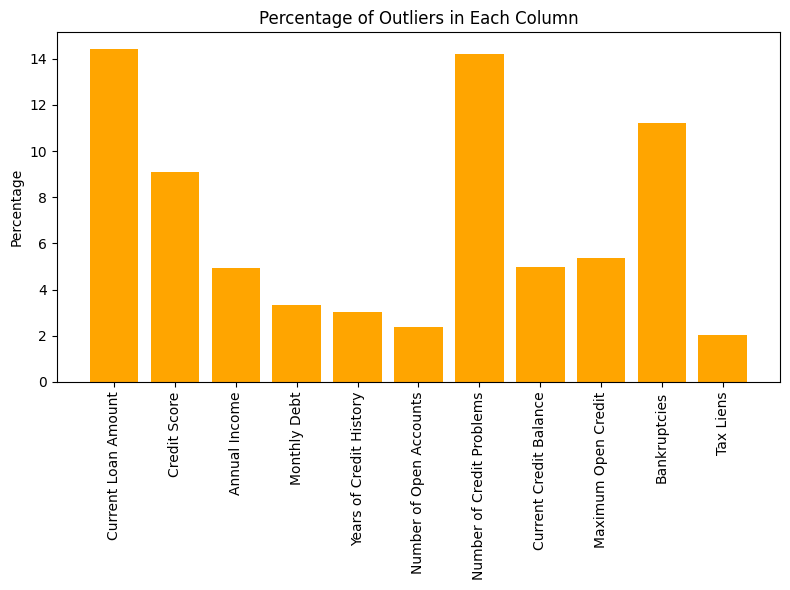

In [219]:
# Count outliers for each variable

def analyze_visualize_outliers(data, num_columns, plot_type="both"):

    # Dictionary to store outlier information for each column
    outlier_data = {}
    for col in num_columns:
        data_column = data[col]

        # Calculate Q1, Q3, IQR and bounds for outliers 
        Q1 = data_column.quantile(0.25)
        Q3 = data_column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers based on the bounds
        outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
        outlier_counts = len(outliers)  # Count of outliers
        outlier_percentages = (outlier_counts / len(data_column)) * 100  # Percentage of outliers

        # Store the outlier data for the current column
        outlier_data[col] = {
            'count': outlier_counts,
            'percentage': outlier_percentages,
            'outliers': outliers.tolist()
        }

        # Print outliers 
        print(f"No. of IQR outliers in '{col}': {outlier_counts}")
        print(f"Percentage of outliers: {outlier_percentages:.2f}%")
        print("-----------------------------------------------------------------")

    # Visualization of outliers based on the specified plot type
    if plot_type == "counts":
        # Plot the number of outliers for each column
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.bar(outlier_data.keys(), [v['count'] for v in outlier_data.values()], color='red')
        ax.set_title('Number of Outliers in Each Column')
        ax.set_ylabel('Count')
        ax.set_xticks(list(outlier_data.keys()))  # Set x-axis ticks
        ax.set_xticklabels(list(outlier_data.keys()), rotation=90)  # Rotate labels for readability
        plt.tight_layout()
        plt.show()

    elif plot_type == "percentages":
        # Plot the percentage of outliers for each column
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.bar(outlier_data.keys(), [v['percentage'] for v in outlier_data.values()], color='orange')
        ax.set_title('Percentage of Outliers in Each Column')
        ax.set_ylabel('Percentage')
        ax.set_xticks(list(outlier_data.keys()))  # Set x-axis ticks
        ax.set_xticklabels(list(outlier_data.keys()), rotation=90)  # Rotate labels for readability
        plt.tight_layout()
        plt.show()

    elif plot_type == "both":
        # Plot both the count and percentage of outliers side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Plot outlier counts
        ax1.bar(outlier_data.keys(), [v['count'] for v in outlier_data.values()], color='red')
        ax1.set_title('Number of Outliers in Each Column')
        ax1.set_ylabel('Count')
        ax1.set_xticks(list(outlier_data.keys()))  # Set x-axis ticks
        ax1.set_xticklabels(list(outlier_data.keys()), rotation=90)  # Rotate labels for readability

        # Plot outlier percentages
        ax2.bar(outlier_data.keys(), [v['percentage'] for v in outlier_data.values()], color='orange')
        ax2.set_title('Percentage of Outliers in Each Column')
        ax2.set_ylabel('Percentage')
        ax2.set_xticks(list(outlier_data.keys()))  # Set x-axis ticks
        ax2.set_xticklabels(list(outlier_data.keys()), rotation=90)  # Rotate labels for readability

        plt.tight_layout()
        plt.show()

    else:
        # Handle invalid plot type
        print(f"Invalid plot_type: {plot_type}. Valid options are 'counts', 'percentages', or 'both'.")

    # Return the dictionary containing outlier information for further use
    return outlier_data

# Call the function to analyze and visualize outliers in numerical columns of the dataset
# Specify 'percentages' as the plot type to visualize the percentage of outliers in each column
outlier_results = analyze_visualize_outliers(credit_data, num_columns, plot_type="percentages")

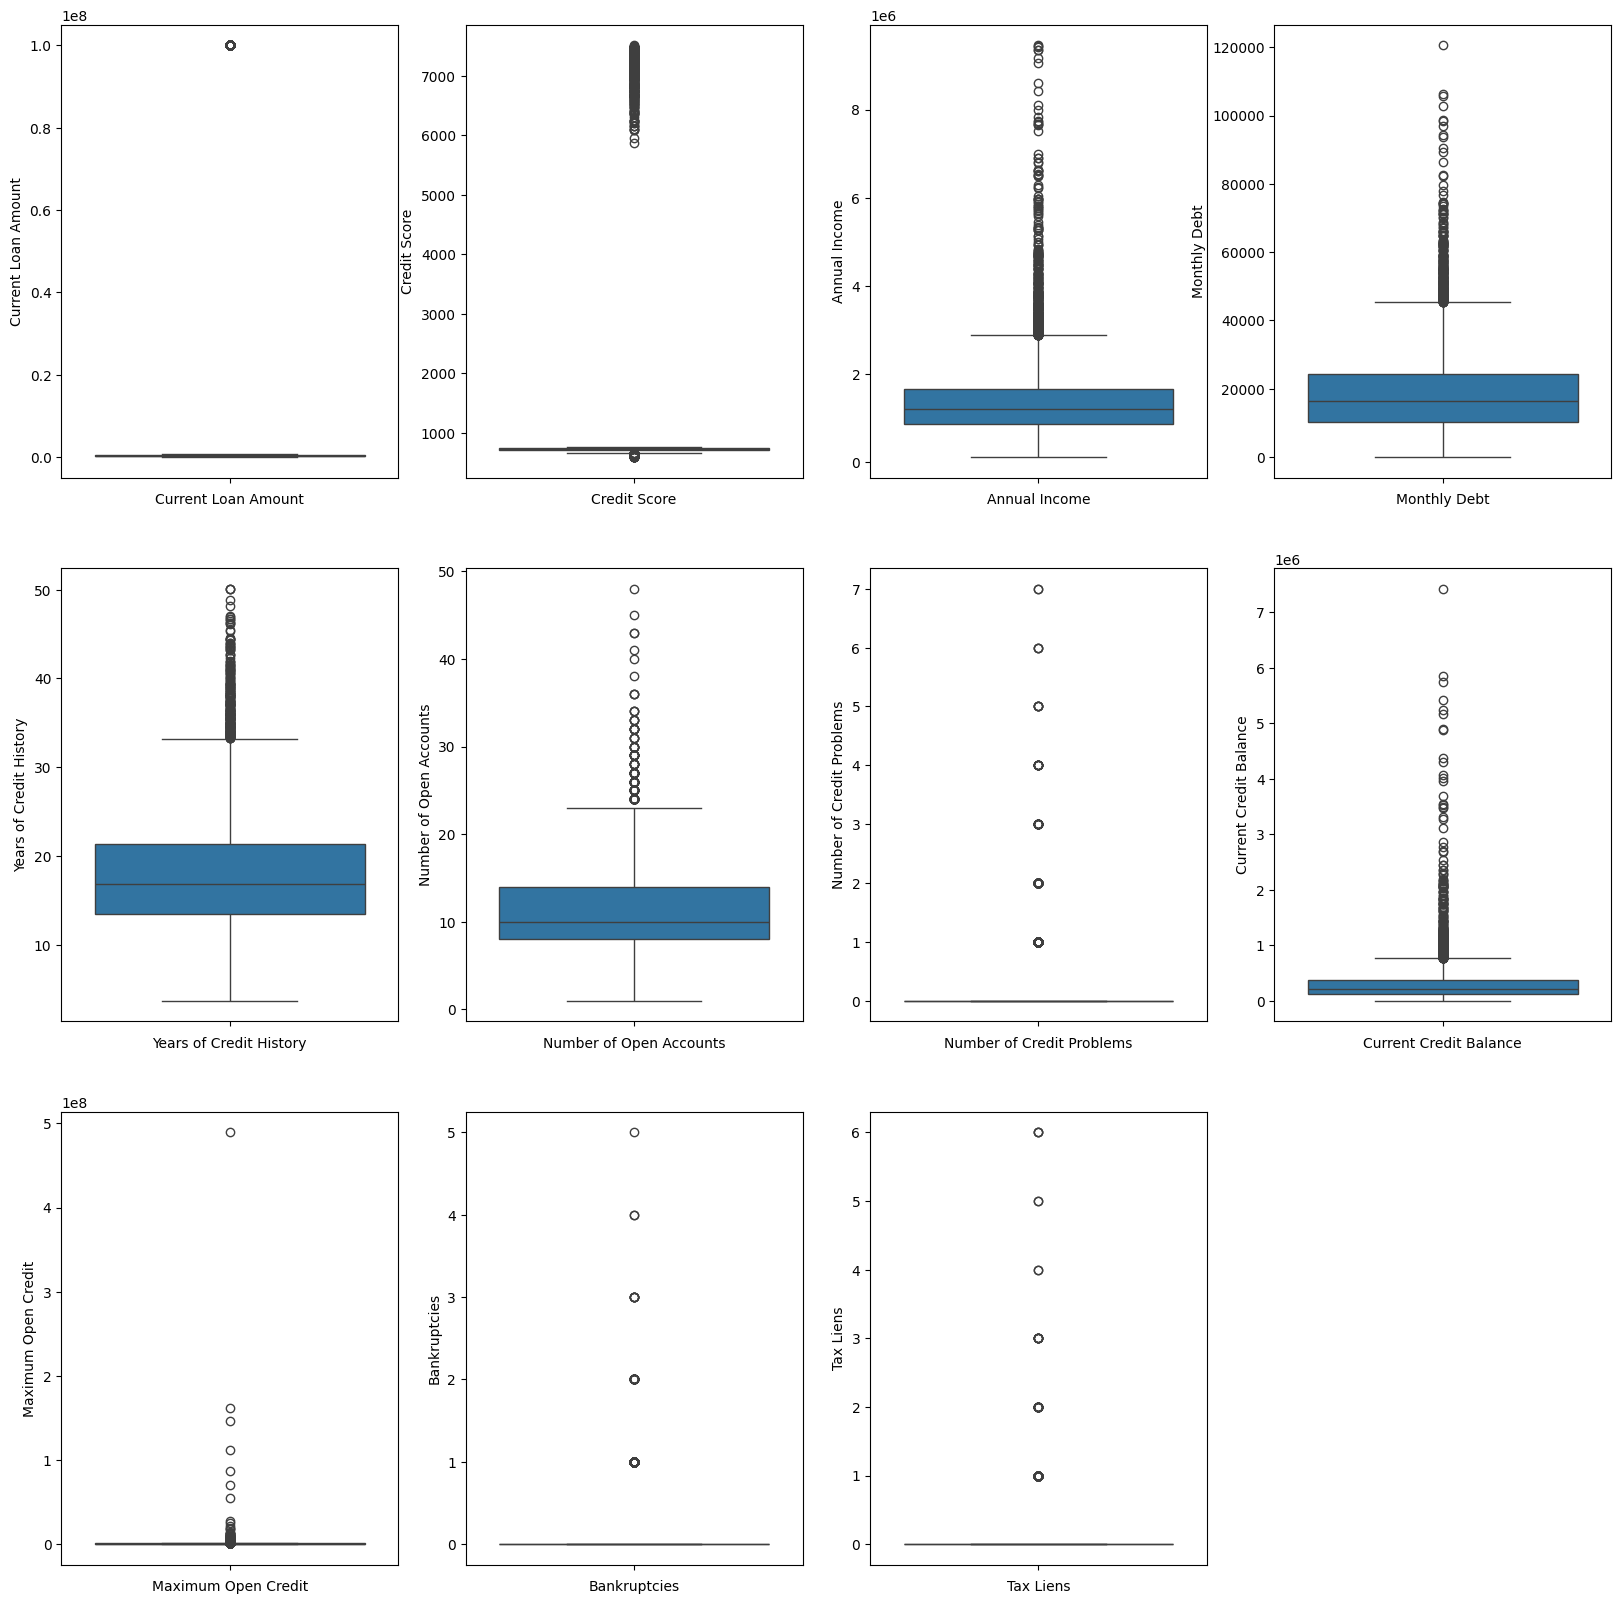

In [220]:
# Boxplot to visualise outliers

fig = plt.figure(figsize=(20,20))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(3,4,counter+1)
    g = sns.boxplot(y=col, data=credit_data)
    plt.xlabel(col)
    counter = counter + 1


In [221]:
# Inspect Current Loan Amount outliers (suspicious)

Q1 = credit_data['Current Loan Amount'].quantile(0.25)
Q3 = credit_data['Current Loan Amount'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = credit_data[credit_data['Current Loan Amount'] > upper_bound]
print(outliers[['Current Loan Amount']])

      Current Loan Amount
2             99999999.00
10            99999999.00
12            99999999.00
13            99999999.00
26            99999999.00
...                   ...
9922          99999999.00
9933          99999999.00
9934          99999999.00
9942          99999999.00
9981          99999999.00

[1098 rows x 1 columns]


### Observations: 

- `Current Loan Amount`: Many outliers exactly equal to 99,999,999 while rest of the data is orders of magnitude smaller. Strong reason to believe data error. 

- `Credit Score`: Typical range for credit score ranges from 300 to 850, and outliers at the 6000-7000 range likely indicates a data quality issue or misformatted data. 

Remove these outliers 


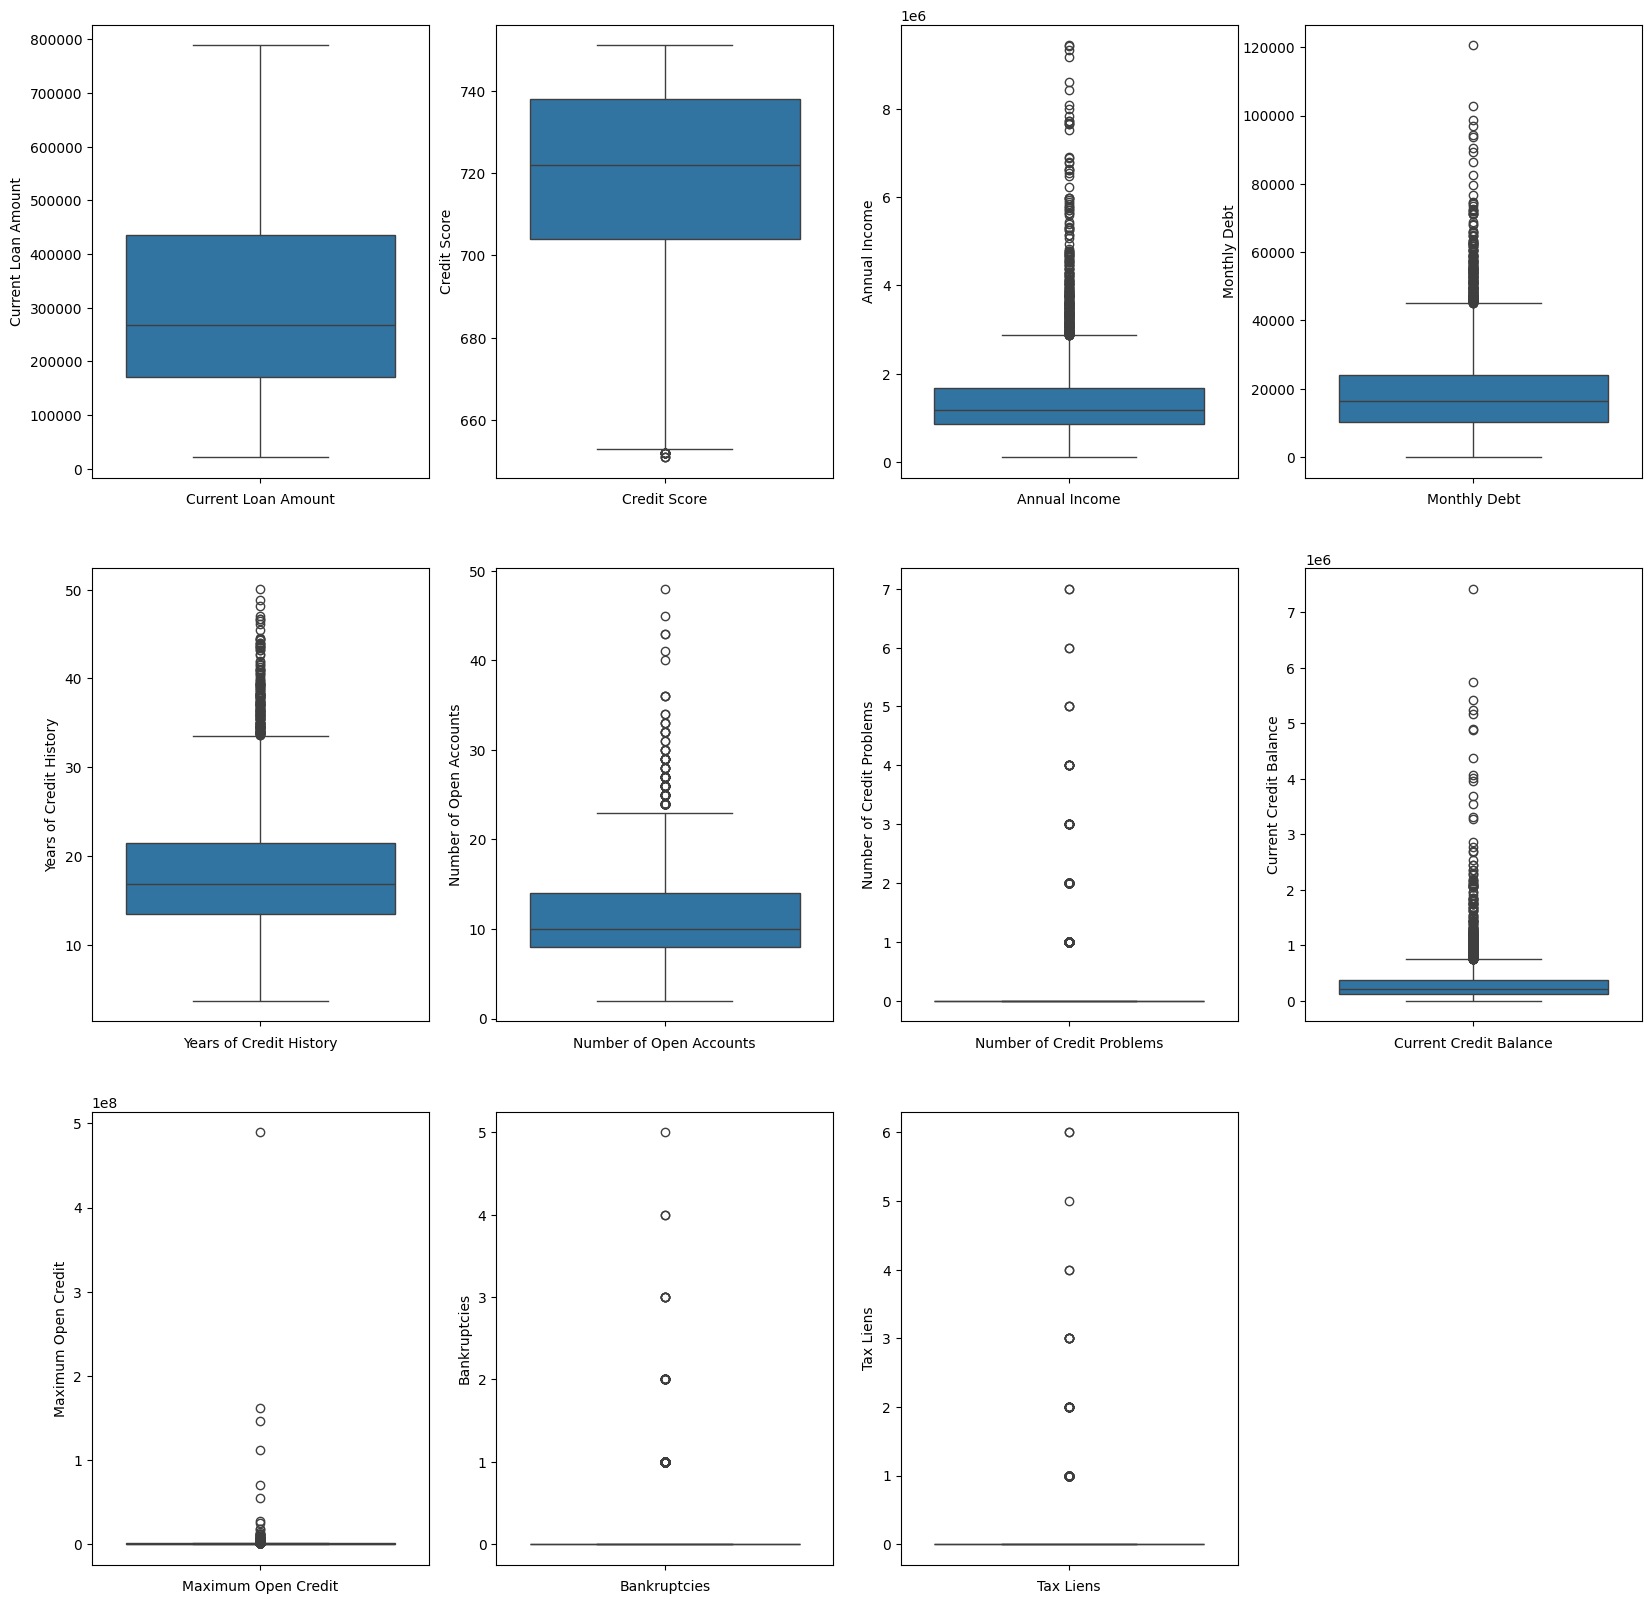

In [222]:
# Remove outliers from Credit Score and Current Loan Amount

Q1_s = credit_data['Credit Score'].quantile(0.25)
Q3_s = credit_data['Credit Score'].quantile(0.75)
IQR_s = Q3_s - Q1_s
lower_bound_s = Q1_s - 1.5 * IQR_s
upper_bound_s = Q3_s + 1.5 * IQR_s

Q1_l = credit_data['Current Loan Amount'].quantile(0.25)
Q3_l = credit_data['Current Loan Amount'].quantile(0.75)
IQR_l = Q3_l - Q1_l
lower_bound_l = Q1_l - 1.5 * IQR_l
upper_bound_l = Q3_l + 1.5 * IQR_l

# Filter out outliers
data = credit_data[(credit_data['Credit Score'] >= lower_bound_s) & (credit_data['Credit Score'] <= upper_bound_s)
                        & (credit_data['Current Loan Amount'] >= lower_bound_l) & (credit_data['Current Loan Amount'] <= upper_bound_l)]

# Boxplots to visualise outliers 
fig = plt.figure(figsize=(20,20))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(3,4,counter+1)
    g = sns.boxplot(y=col, data=data)
    plt.xlabel(col)
    counter = counter + 1

### Observation: 
- With outliers removed, data looks a lot more acceptable!

# 4. Data Visualization & EDA

Text(0, 0.5, '')

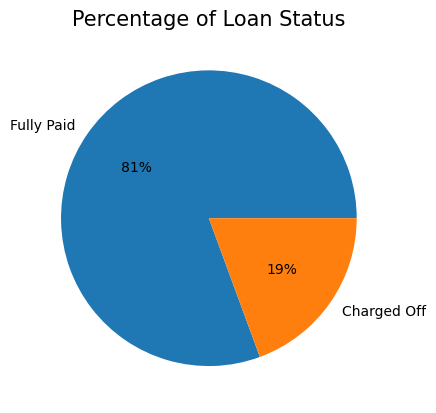

In [ ]:
# Visualising Loan Status (response variable)

data['Loan Status'].value_counts().plot(kind='pie', autopct='%0.0f%%')
plt.title('Percentage of Loan Status', fontsize=15)
plt.ylabel('')

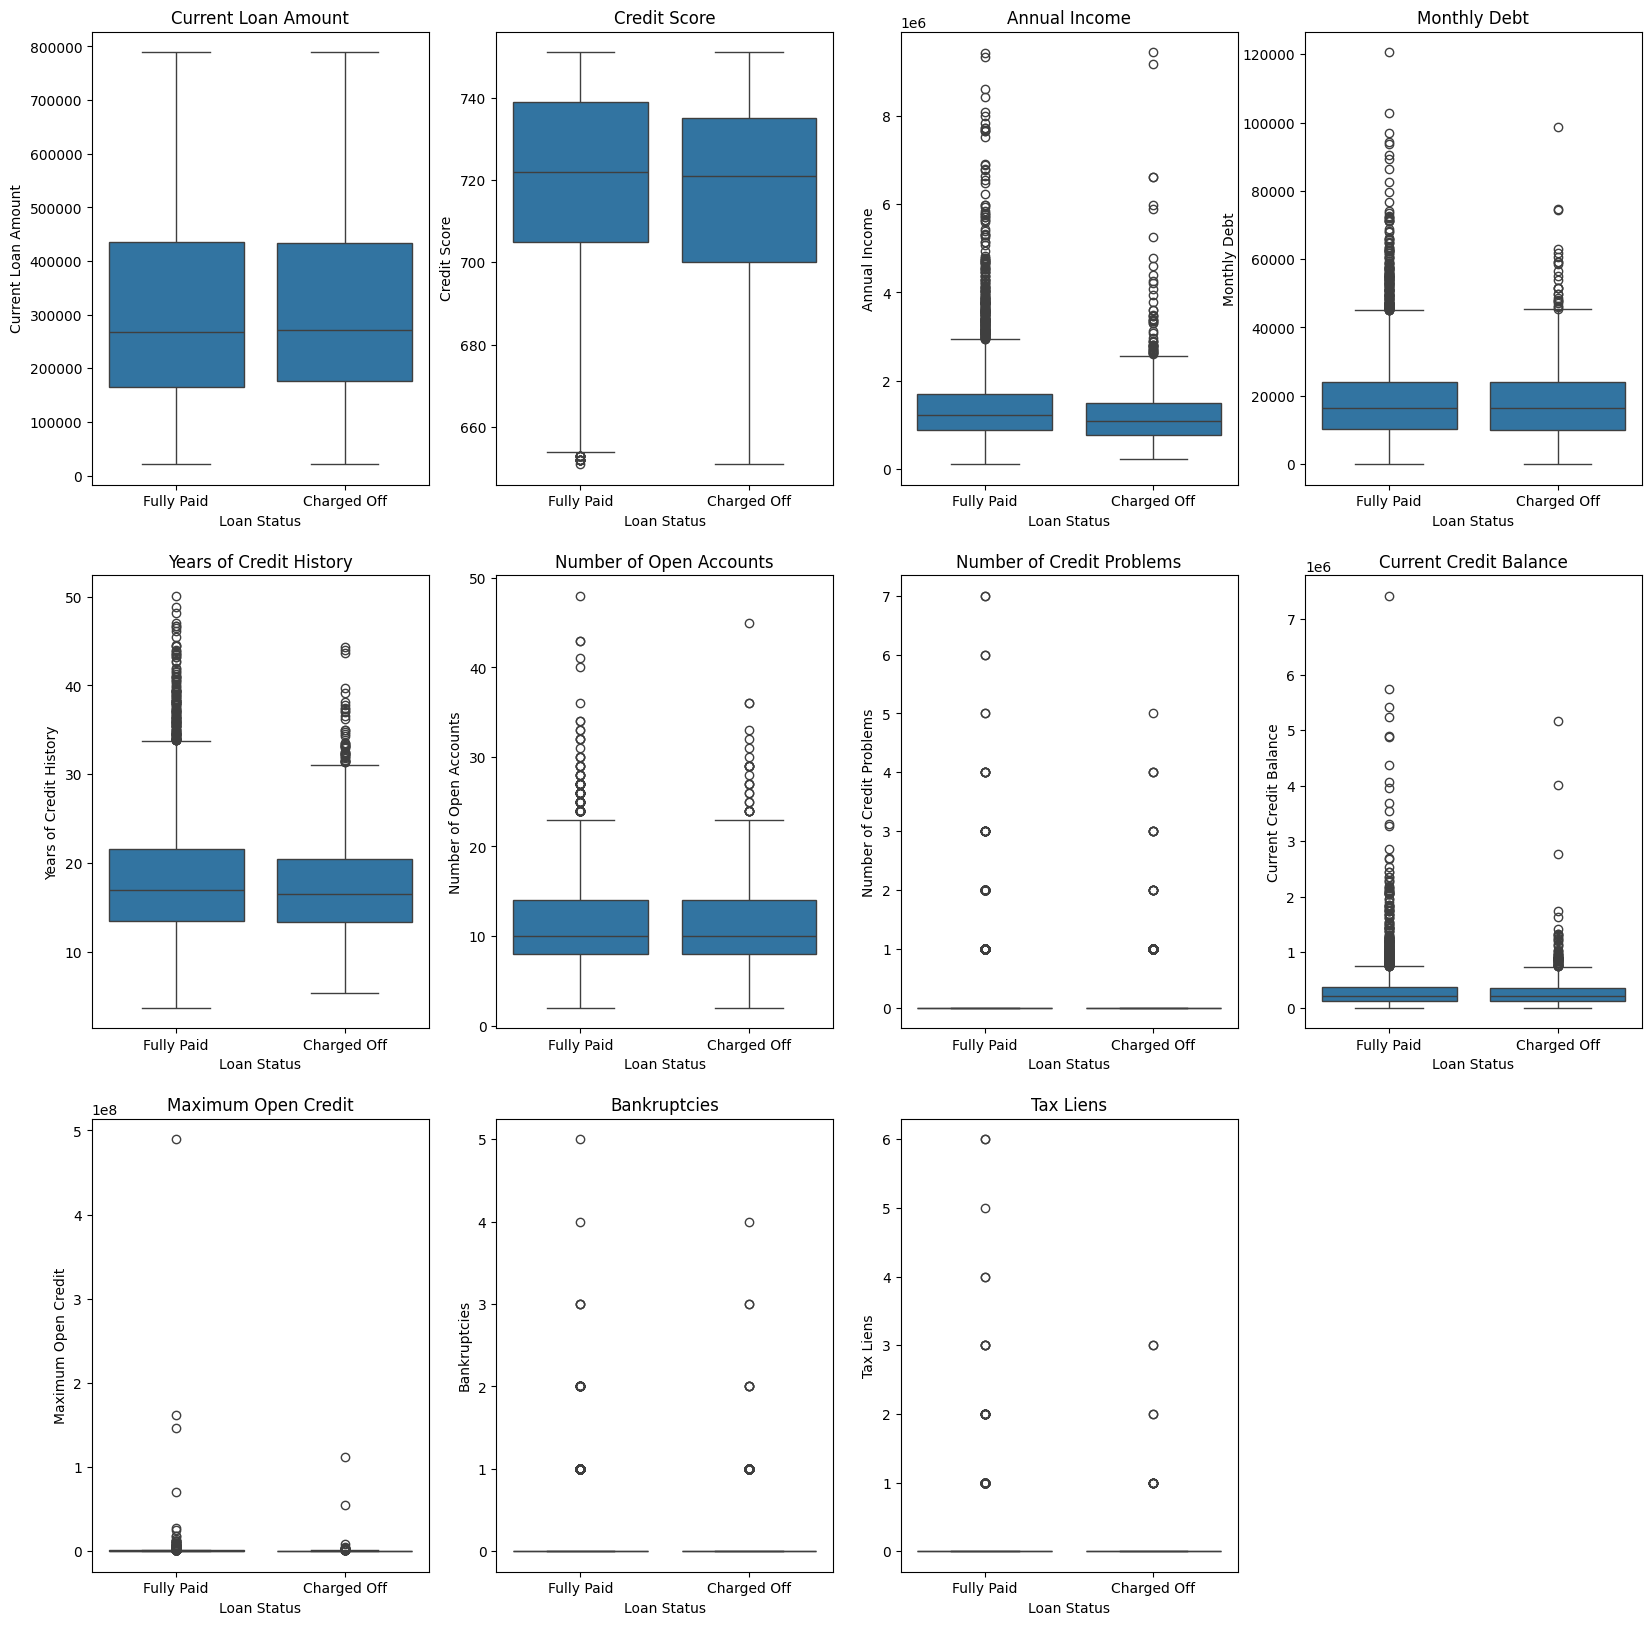

In [224]:
# Correlations between numerical variables and Loan Status
fig = plt.figure(figsize=(20,20))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(3,4,counter+1)
    g = sns.boxplot(x="Loan Status", y=col, data=data)
    plt.title(f'{col}')
    plt.xlabel('Loan Status')
    plt.ylabel(col)
    counter = counter + 1

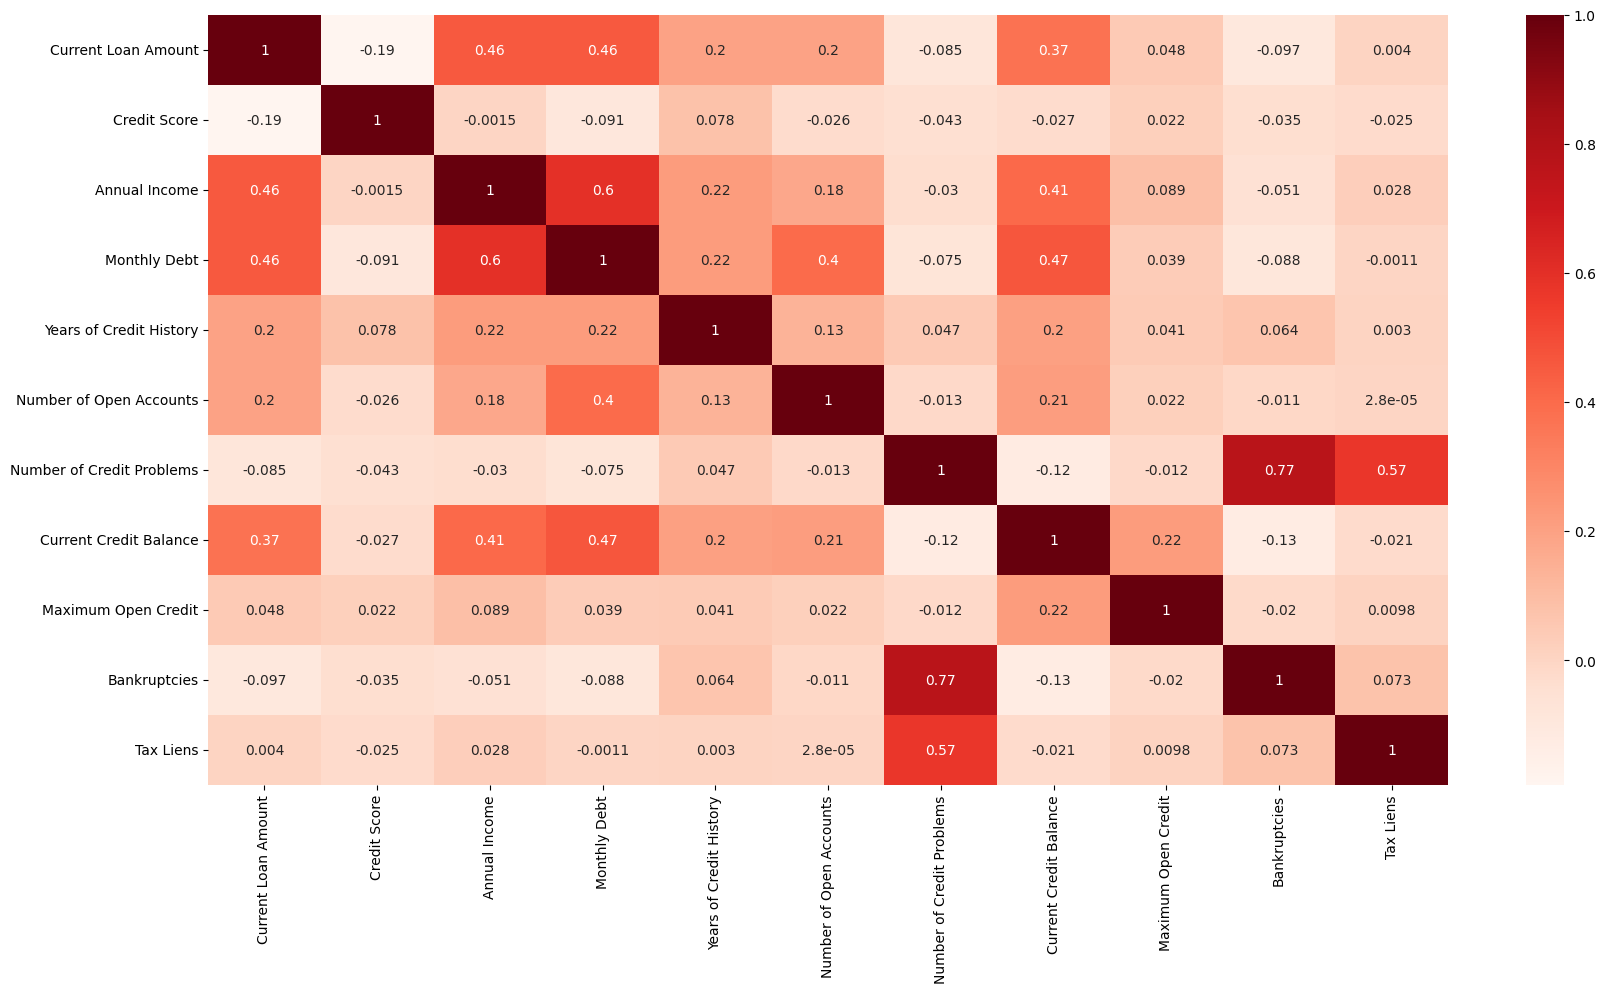

In [225]:
# Correlations among numerical variables 
plt.figure(figsize = (20,10))

sns.heatmap(data[num_columns].corr(), cmap = 'Reds', annot = True)
plt.show()

### Observations: 
Strong Correlations 
- Number of Credit Problems with Bankruptcies (0.77)
- Annual Income with Monthly Debt (0.6)
- Number of Credit Problems with Tax Liens (0.57)

Moderate Correlations 
- Current Credit Balance with Monthly Debt (0.47)
- Current Loan Amount with Monthly Debt (0.46)
- Current Loan Amount with Annual Income (0.46)

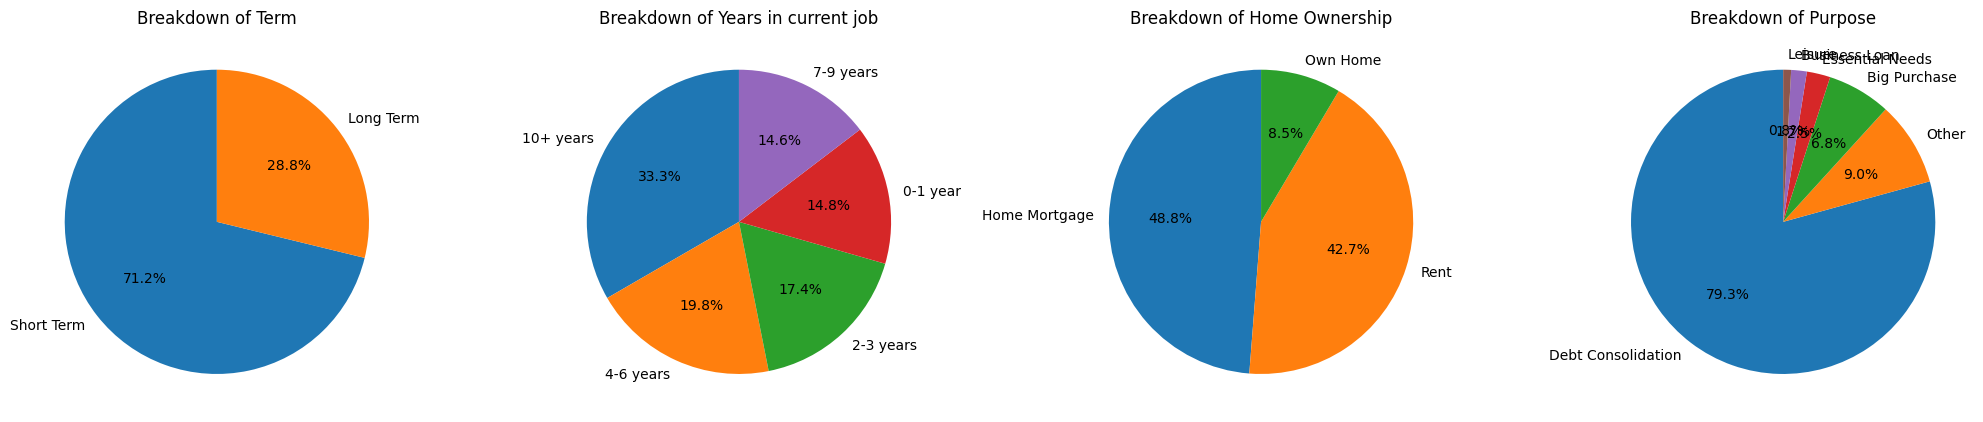

In [251]:
# Visualising categorical predictors 

def plot_overall_pie_charts(df, columns):
    n = len(columns)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))

    if n == 1:
        axes = [axes]  # handle single-column case

    for i, column in enumerate(columns):
        data = df[column].dropna().str.strip()
        counts = data.value_counts(normalize=True) * 100
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Breakdown of {column}')

    plt.tight_layout()
    plt.show()

columns_to_plot = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']
plot_overall_pie_charts(data, columns_to_plot)

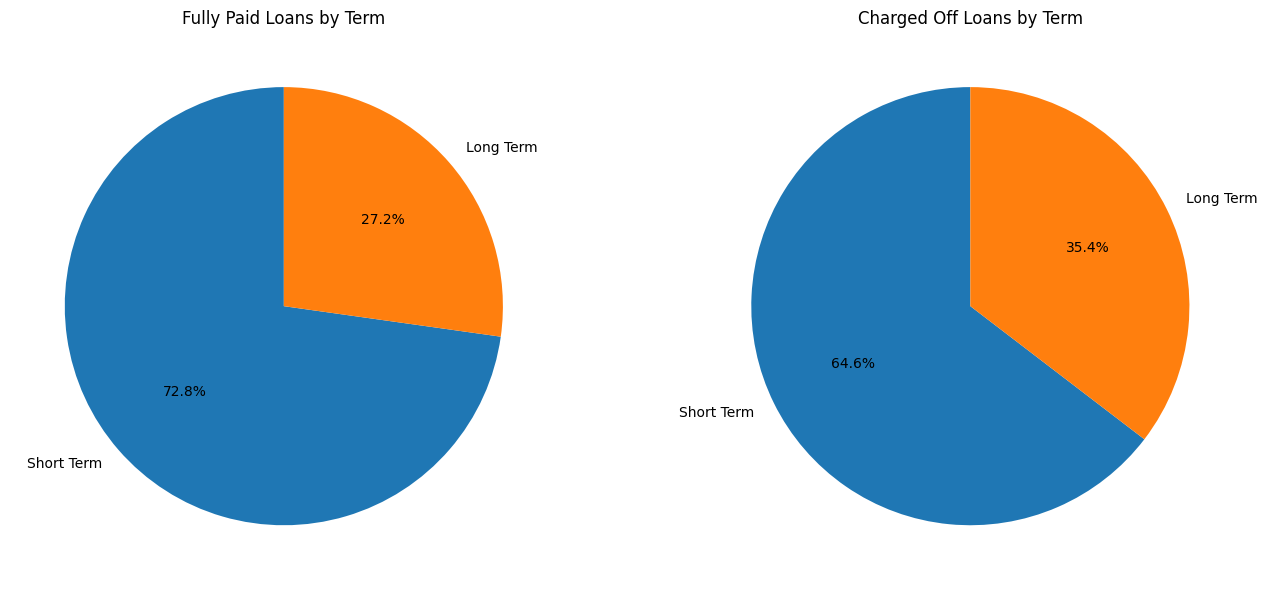

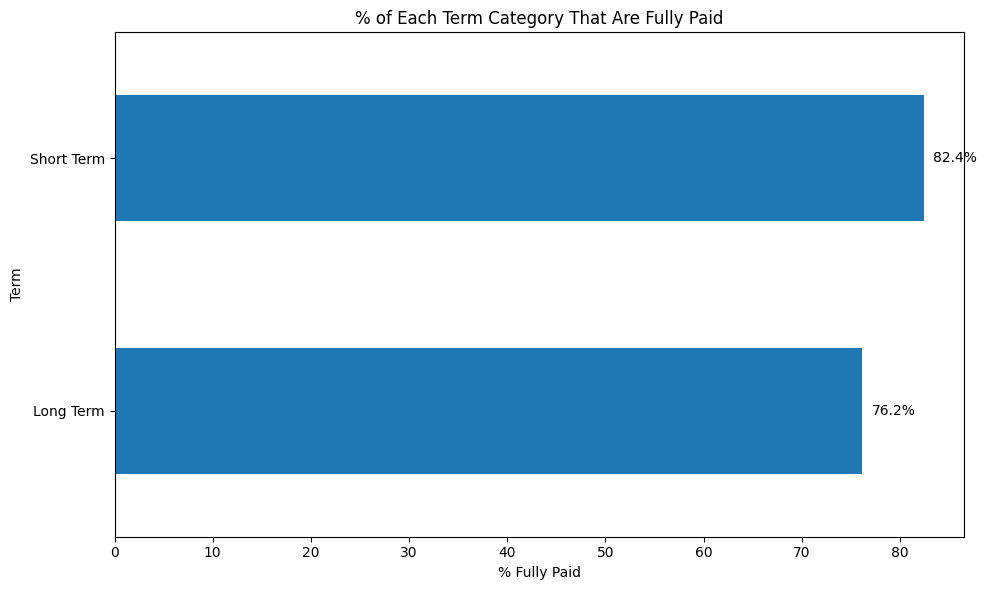

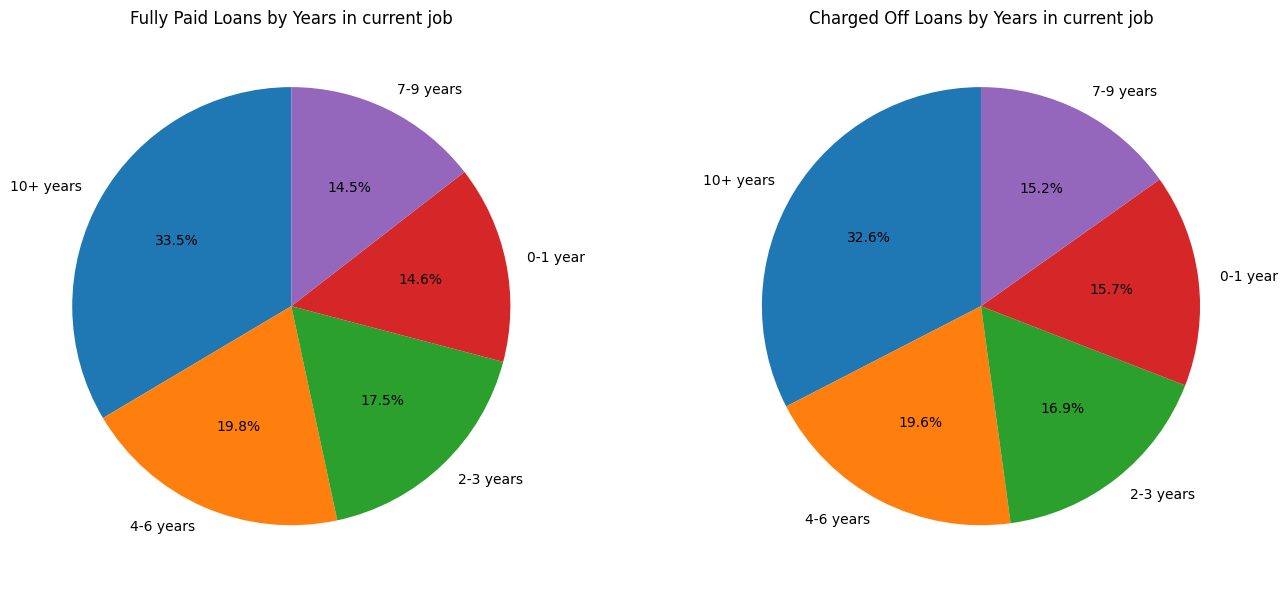

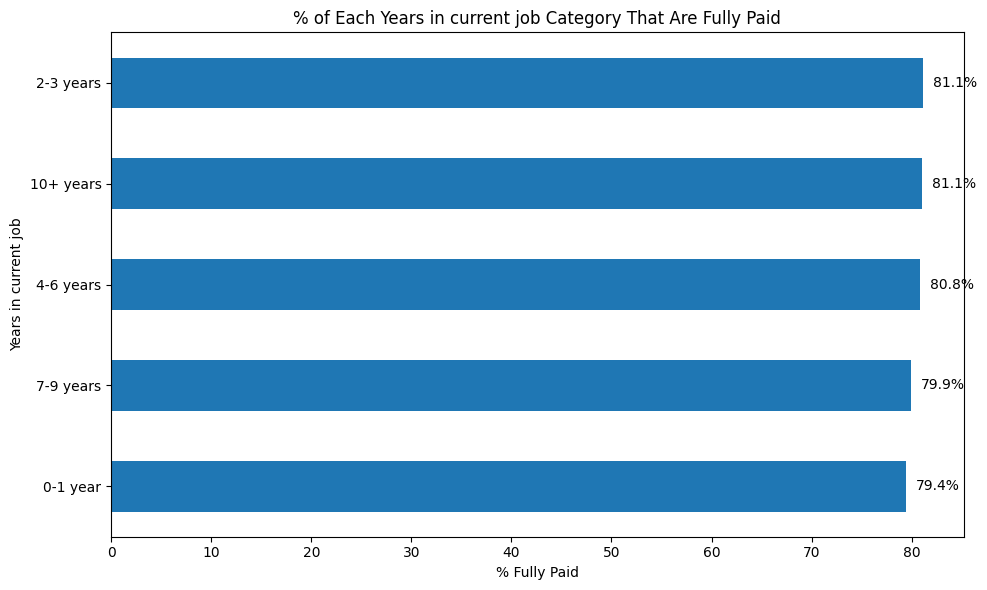

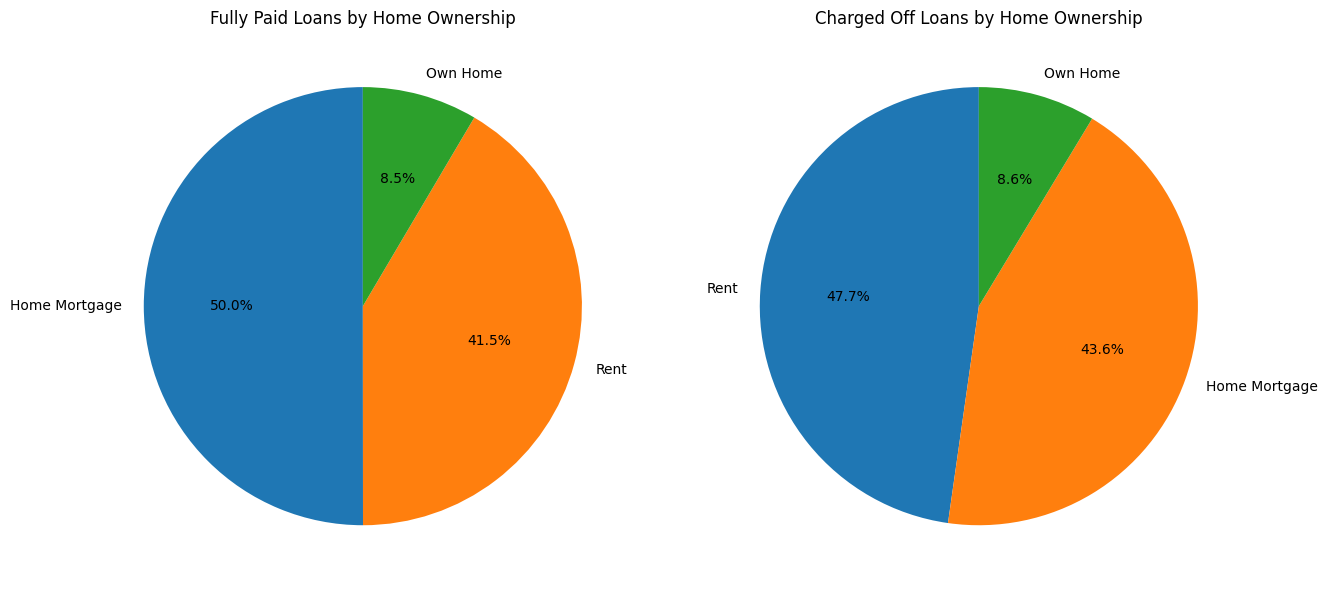

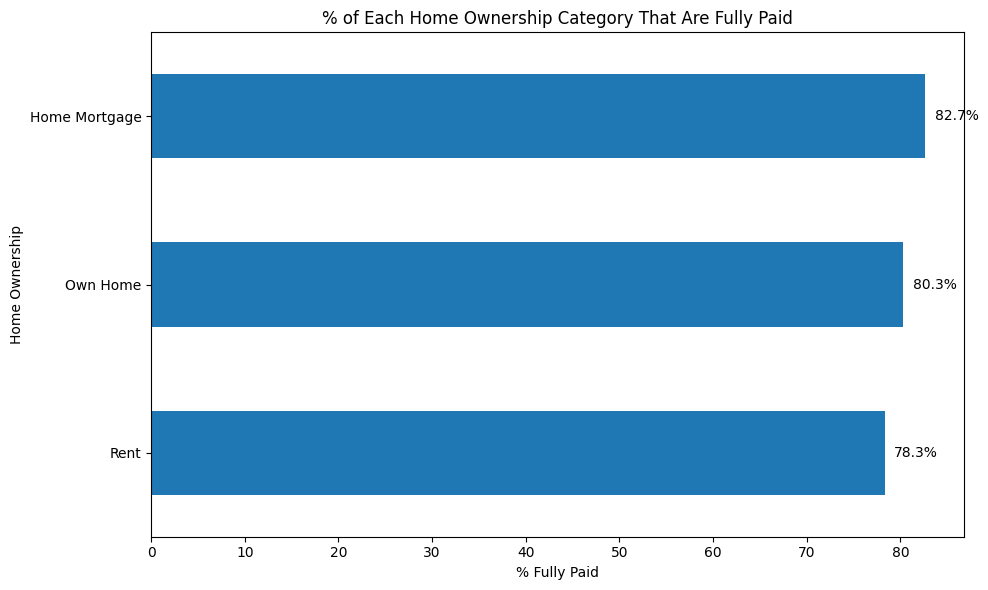

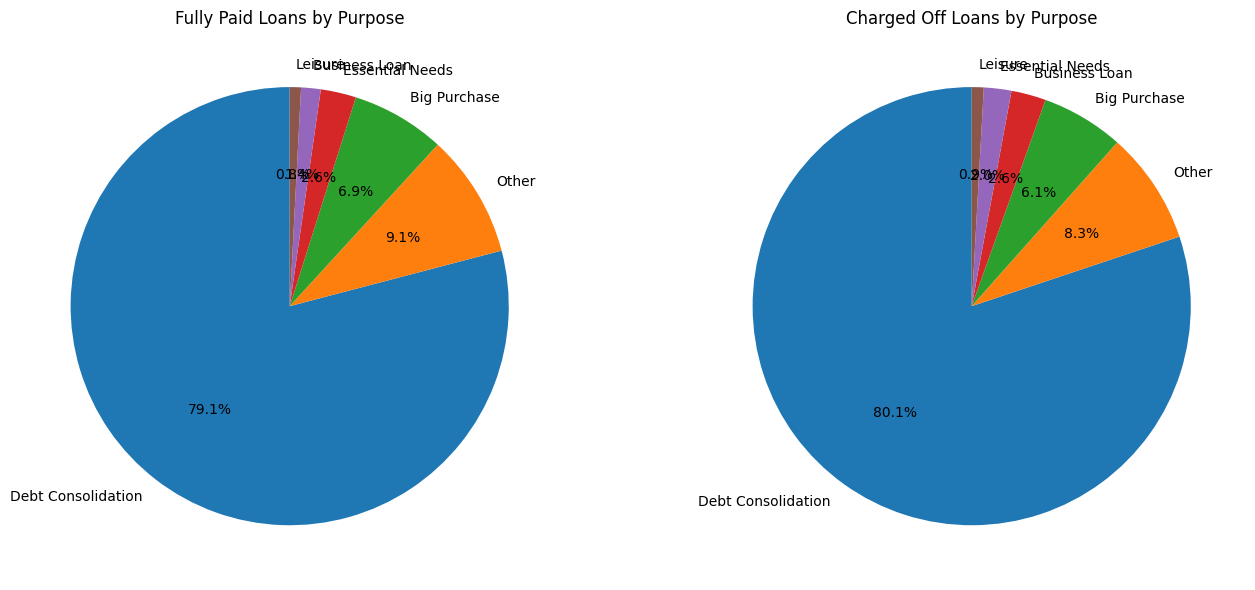

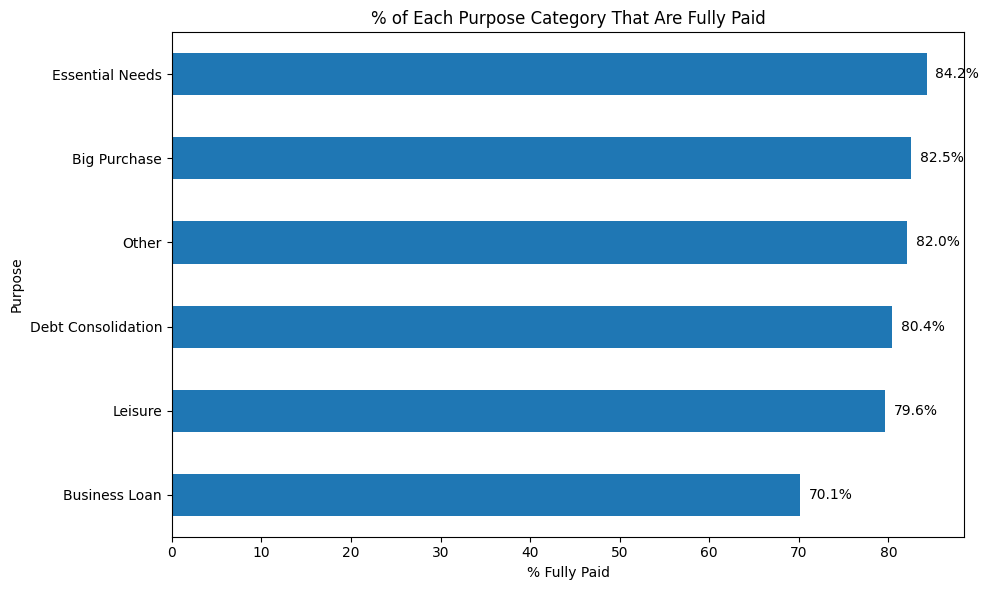

In [256]:
# Function to visualise relationship between categorical predictors and Loan Status  
def plot_loan_status_analysis(df, column):
    # Drop rows with missing values in the target column
    df_clean = df.dropna(subset=[column, 'Loan Status'])

    # Pie Charts
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    for i, status in enumerate(['Fully Paid', 'Charged Off']):
        counts = df_clean[df_clean['Loan Status'] == status][column].value_counts(normalize=True) * 100
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'{status} Loans by {column}')

    plt.tight_layout()
    plt.show()

    # Bar Chart: % of each group that are Fully Paid
    group_counts = df_clean.groupby([column, 'Loan Status']).size().unstack(fill_value=0)
    fully_paid_percent = (group_counts['Fully Paid'] / group_counts.sum(axis=1)) * 100
    fully_paid_percent = fully_paid_percent.sort_values()

    ax = fully_paid_percent.plot(kind='barh', figsize=(10, 6)) # Plot
    plt.xlabel('% Fully Paid')
    plt.title(f'% of Each {column} Category That Are Fully Paid')

    for i, v in enumerate(fully_paid_percent): # Add percentage labels
        ax.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

# Plot graphs
plot_loan_status_analysis(data, 'Term')
plot_loan_status_analysis(data, 'Years in current job')
plot_loan_status_analysis(data, 'Home Ownership')
plot_loan_status_analysis(data, 'Purpose')


### Observations: 
- `Purpose`: A lower percentage of Business Loans are fully paid (around 70% fully paid) as compared to all other loan types (around 80% fully paid). 
- `Term Category`: A higher percentage of Short Term loans are fully paid (82%) as compared to Long Term loans (76%)